<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 7.1: Decision Trees

INSTRUCTIONS:

- Read the guides and hints then create the necessary analysis and code to find and answer and conclusion for the scenario below.
- The baseline results (minimum) are:
    - **Accuracy** = 0.6895
    - **ROC AUC**  = 0.5690
- Try to achieve better results!

# Foreword
It is common that companies and professionals start with the data immediately available. Although this approach works, ideally the first step is to idenfy the problem or question and only then identify and obtain the set of data that can help to solve or answer the problem.

Also, given the current abundance of data, processing power and some particular machine learning methods, there could be a temptation to use ALL the data available. **Quality** is _**better**_ then **Quantity**!

Part of calling this discipline **Data Science** is that it is supposed to follow a process and not reach conclusions without support from evidence.

Moreover, it is a creative, exploratory, labour and iteractive processes. It is part of the process to repeat, review and change when finding a dead-end.

# Step 1: Define the problem or question
Identify the subject matter and the given or obvious questions that would be relevant in the field.

## Potential Questions
List the given or obvious questions.

## Actual Question
Choose the **one** question that should be answered.

In [1]:
# Potential Questions
# Is a first time donor likely to donate bload again?
# Is a donor likely to donate again after a long period without making any donations?
# What is the size of the period after which donors are less likely to donate bload again?

# Actual Question
# Has the person donated blood in March 2007?

# Step 2: Find the Data
### Blood Transfusion Service Center DataSet
- **Abstract**: Data taken from the **Blood Transfusion Service Center** in Hsin-Chu City in Taiwan.
- Date Donated: 2008-10-03
- Source:
        Original Owner and Donor: Prof. I-Cheng Yeh 
        Department of Information Management 
        Chung-Hua University, 
        Hsin Chu, Taiwan 30067, R.O.C. 

- Citation Request:
    **NOTE**: Reuse of this database is unlimited with retention of copyright notice for Prof. I-Cheng Yeh and the following published paper: 

        Yeh, I-Cheng, Yang, King-Jang, and Ting, Tao-Ming, "Knowledge discovery on RFM model using Bernoulli sequence, "Expert Systems with Applications, 2008
        
### UCI - Machine Learning Repository
- Center for Machine Learning and Intelligent Systems

The [**UCI Machine Learning Repository**](http://archive.ics.uci.edu/ml/about.html) is a collection of databases, domain theories, and data generators that are used by the machine learning community for the empirical analysis of machine learning algorithms.

In [2]:
# Import Libraries and Modules

import numpy as np
import pandas as pd

# %matplotlib inline
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

import seaborn as sns
import warnings

In [3]:
sns.set(style='ticks', font_scale=1.4)
warnings.filterwarnings('ignore')

# Step 3: Read the Data
- Read the data
- Perform some basic structural cleaning to facilitate the work

In [4]:
# reading and inspect the data

df = pd.read_csv('transfusion.data.csv')
print(df.dtypes)
df.head()

Recency (months)                              int64
Frequency (times)                             int64
Monetary (c.c. blood)                         int64
Time (months)                                 int64
whether he/she donated blood in March 2007    int64
dtype: object


,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


# Step 4: Explore and Clean the Data
- Perform some initial simple **EDA** (Exploratory Data Analysis)
- Check for
    - **Number of features**
    - **Data types**
    - **Domains, Intervals**
    - **Outliers** (are they valid or expurious data [read or measure errors])
    - **Null** (values not present or coded [as zero of empty strings])
    - **Missing Values** (coded [as zero of empty strings] or values not present)
    - **Coded content** (classes identified by numbers or codes to represent absence of data)

In [5]:
df.isnull().sum()

Recency (months)                              0
Frequency (times)                             0
Monetary (c.c. blood)                         0
Time (months)                                 0
whether he/she donated blood in March 2007    0
dtype: int64

In [6]:
df.isnull().sum().sum()

0

In [7]:
df.shape

(748, 5)

In [8]:
df.columns.to_list()

['Recency (months)',
 'Frequency (times)',
 'Monetary (c.c. blood)',
 'Time (months)',
 'whether he/she donated blood in March 2007']

In [9]:
# change the names of the columns and inspect again
df.columns = ['Recency', 'Frequency', 'Monetary',
              'Time', 'Donated_Mar_2007']
print(df.dtypes)
df.head()

Recency             int64
Frequency           int64
Monetary            int64
Time                int64
Donated_Mar_2007    int64
dtype: object


,Recency,Frequency,Monetary,Time,Donated_Mar_2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Recency           748 non-null    int64
 1   Frequency         748 non-null    int64
 2   Monetary          748 non-null    int64
 3   Time              748 non-null    int64
 4   Donated_Mar_2007  748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


In [11]:
df.describe()

,Recency,Frequency,Monetary,Time,Donated_Mar_2007
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,0.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


In [12]:
# Number of features
print('- Number of features: %d' % df.shape[1])
for c in df.columns:
    print('  - %s' % c)

# Data types
print('\n- Data types')
print(df.dtypes)

# Domains, Intervals
print('\n- Domains, Intervals')
for c in df.columns:
    x = df[c].unique()
    x.sort()
    print('  - %-16s: min: %d, max: %d' % (c, df[c].min(), df[c].max()))
    print('    values: %s' % x)

print('\n- Nulls')
for c in df.columns:
    print('  - %-16s: Nulls: %d' % (c, df[c].isna().sum()))

- Number of features: 5
  - Recency
  - Frequency
  - Monetary
  - Time
  - Donated_Mar_2007

- Data types
Recency             int64
Frequency           int64
Monetary            int64
Time                int64
Donated_Mar_2007    int64
dtype: object

- Domains, Intervals
  - Recency         : min: 0, max: 74
    values: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 20 21 22 23 25
 26 35 38 39 40 72 74]
  - Frequency       : min: 1, max: 50
    values: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 26 33 34 38 41 43 44 46 50]
  - Monetary        : min: 250, max: 12500
    values: [  250   500   750  1000  1250  1500  1750  2000  2250  2500  2750  3000
  3250  3500  3750  4000  4250  4500  4750  5000  5250  5500  5750  6000
  6500  8250  8500  9500 10250 10750 11000 11500 12500]
  - Time            : min: 2, max: 98
    values: [ 2  3  4  9 10 11 12 13 14 15 16 17 18 19 21 22 23 24 25 26 27 28 29 30
 31 32 33 34 35 36 37 38 39 40 41 42 43 45 46 47 

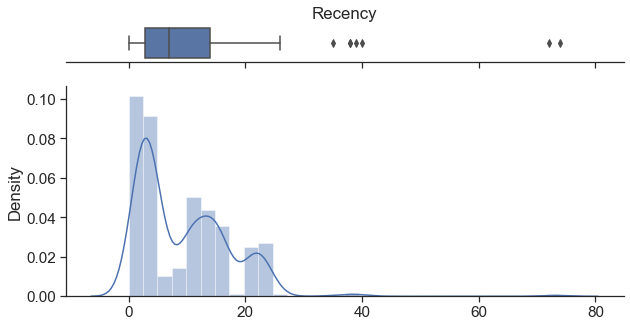

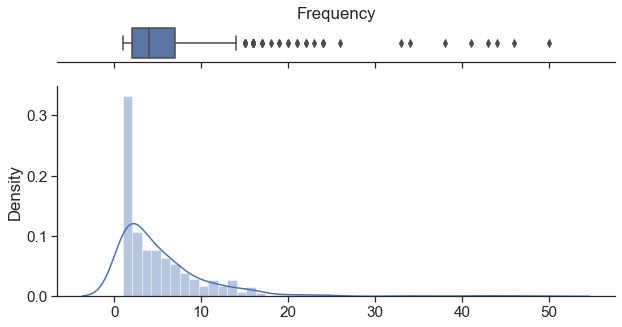

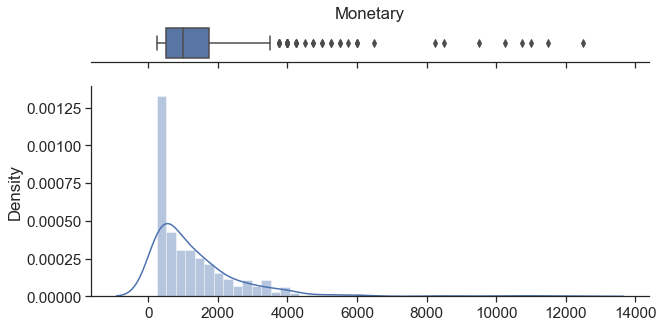

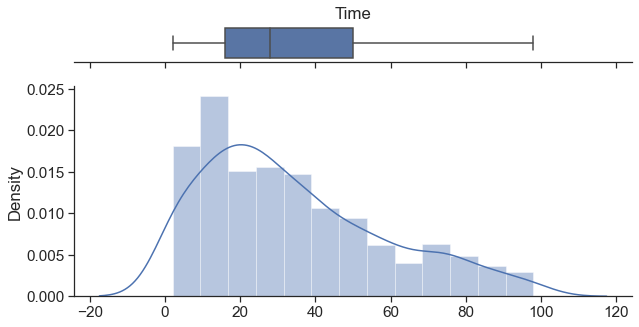

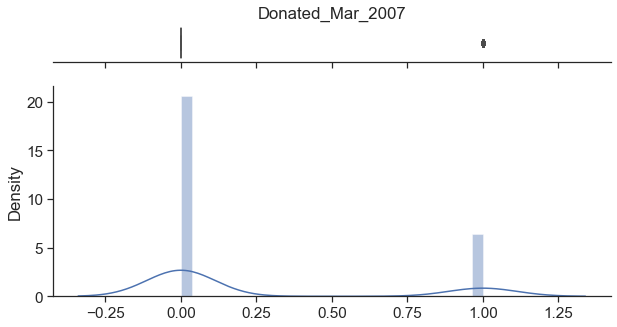

In [13]:
# Check for Outliers
for c in df.columns:
    fig, ax = plt.subplots(2,
                           figsize=(10, 5),
                           sharex=True,
                           gridspec_kw={'height_ratios': (0.15, 0.85)})

    ax_box = ax[0]
    ax_box = sns.boxplot(df[c], ax=ax_box)
    ax_box.set(title=c, yticks=[], xlabel='')
    sns.despine(ax=ax_box, left=True)

    ax_hist = ax[1]
    ax_hist = sns.distplot(df[c], ax=ax_hist)
    ax_hist.set(xlabel='')
    sns.despine(ax=ax_hist)

plt.show()

In [14]:
# create X and y to match Scikit-Learn parlance

features = ['Recency', 'Frequency', 'Monetary', 'Time']
outcome = 'Donated_Mar_2007'


# X = data.iloc[:,:-1]
# y = data.iloc[:, -1]

# X include all the features
X = df[features].copy()
# y is the target variable
# Note: As it is a classification problem,
#       0 and 1 are converted to '0' and '1' (int to str)
# y = df[outcome].astype(str).copy()
y = df[outcome]

In [15]:
# Check the data

# About X
print('X is a %s' % type(X))
print('X has %d rows and %d columns' % X.shape)
print('Basic Statistics about X%s' % ('_'*50))
print(df.describe())
print('')
print('Sample of X%s' % ('_'*50))
print(X.head())

X is a <class 'pandas.core.frame.DataFrame'>
X has 748 rows and 4 columns
Basic Statistics about X__________________________________________________
          Recency   Frequency      Monetary        Time  Donated_Mar_2007
count  748.000000  748.000000    748.000000  748.000000        748.000000
mean     9.506684    5.514706   1378.676471   34.282086          0.237968
std      8.095396    5.839307   1459.826781   24.376714          0.426124
min      0.000000    1.000000    250.000000    2.000000          0.000000
25%      2.750000    2.000000    500.000000   16.000000          0.000000
50%      7.000000    4.000000   1000.000000   28.000000          0.000000
75%     14.000000    7.000000   1750.000000   50.000000          0.000000
max     74.000000   50.000000  12500.000000   98.000000          1.000000

Sample of X__________________________________________________
   Recency  Frequency  Monetary  Time
0        2         50     12500    98
1        0         13      3250    28
2       

In [16]:
# About y
print('y is a %s' % type(y))
print('y has %d rows' % y.shape)
print('')
print('Sample of y%s' % ('_'*50))
print(y[:5])

y is a <class 'pandas.core.series.Series'>
y has 748 rows

Sample of y__________________________________________________
0    1
1    1
2    1
3    1
4    0
Name: Donated_Mar_2007, dtype: int64


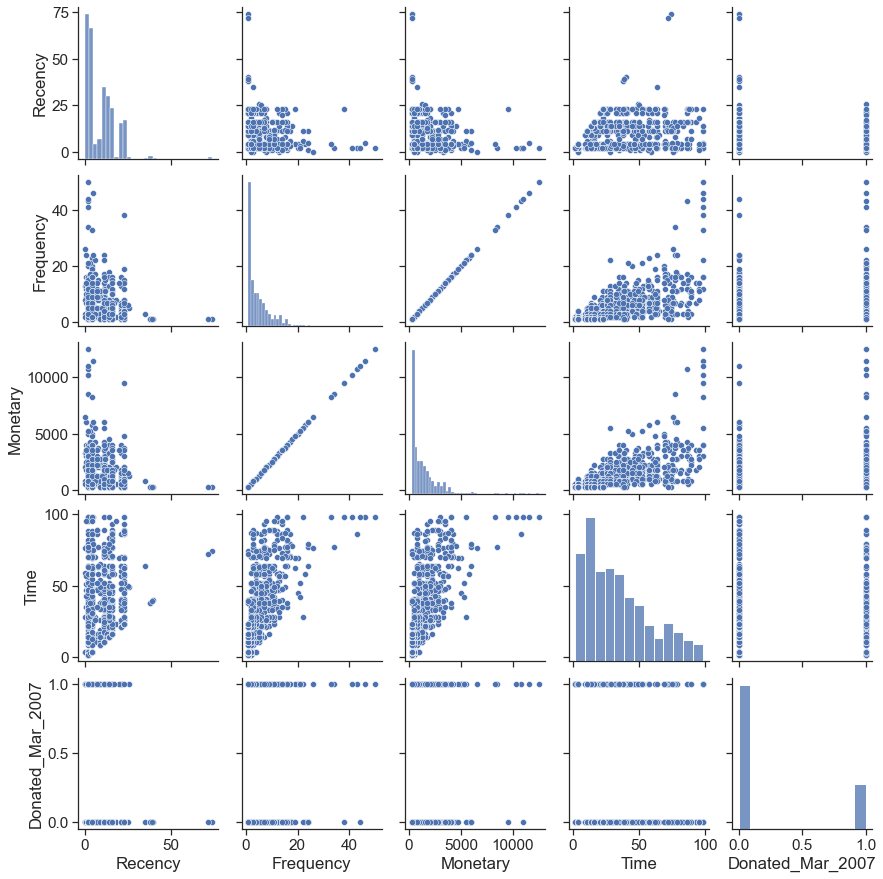

In [17]:
# Visualise the data points
# visualise features in pairs
sns.pairplot(df)
plt.show()

# Step 5: Prepare the Data
- Deal with the data as required by the modelling technique
    - **Outliers** (remove or adjust if possible or necessary)
    - **Null** (remove or interpolate if possible or necessary)
    - **Missing Values** (remove or interpolate if possible or necessary)
    - **Coded content** (transform if possible or necessary [str to number or vice-versa])
    - **Normalisation** (if possible or necessary)
    - **Feature Engeneer** (if useful or necessary)

# Step 6: Modelling
Refer to the Problem and Main Question.
- What are the input variables (features)?
- Is there an output variable (label)?
- If there is an output variable:
    - What is it?
    - What is its type?
- What type of Modelling is it?
    - [ ] Supervised
    - [ ] Unsupervised 
- What type of Modelling is it?
    - [ ] Regression
    - [ ] Classification (binary) 
    - [ ] Classification (multi-class)
    - [ ] Clustering

# Step 7: Split the Data

Need to check for **Supervised** modelling:
- Number of known cases or observations
- Define the split in Training/Test or Training/Validation/Test and their proportions
- Check for unbalanced classes and how to keep or avoid it when spliting

# Step 8: Define a Model

Define the model and its hyper-parameters.

Consider the parameters and hyper-parameters of each model at each (re)run and after checking the efficiency of a model against the training and test datasets.

# Step 9: Fit the Model

# Step 10: Verify and Evaluate the Training Model
- Use the **training** data to make predictions
- Check for overfitting
- What metrics are appropriate for the modelling approach used
- For **Supervised** models:
    - Check the **Training Results** with the **Training Predictions** during development
- Analyse, modify the parameters and hyper-parameters and repeat (within reason) until the model does not improve

# Step 11: Make Predictions and Evaluate the Test Model
**NOTE**: **Do this only after not making any more improvements in the model**.

- Use the **test** data to make predictions
- For **Supervised** models:
    - Check the **Test Results** with the **Test Predictions**

# Step 12: Solve the Problem or Answer the Question
The results of an analysis or modelling can be used:
- As part of a product or process, so the model can make predictions when new input data is available
- As part of a report including text and charts to help understand the problem
- As input for further questions



---



---



> > > > > > > > > © 2021 Institute of Data


---



---



